# DAVI CA2

## Main Objective: Are Electric Motor Vehicles More Beneficial In Singapore?

#### 

## Objective 1:
### Would Greater Use Of Electric Motor Vehicles Reduce Carbon Emissions As Compared To Petrol Vehicles

<AxesSubplot:ylabel='None'>

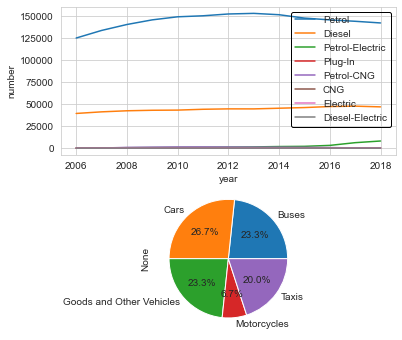

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset1 = pd.read_csv('dataset1.csv', sep=',')


# subset data slices for plotting
petrol = dataset1[dataset1['engine'] == 'Petrol']
diesel = dataset1[dataset1['engine'] == 'Diesel']
petrolElectric = dataset1[dataset1['engine'] == 'Petrol-Electric']
petrolElectric2 = dataset1[dataset1['engine'] == 'Petrol-Electric (Plug-In)']
petrolCNG = dataset1[dataset1['engine'] == 'Petrol-CNG']
CNG = dataset1[dataset1['engine'] == 'CNG']
electric = dataset1[dataset1['engine'] == 'Electric']
dieselElectric = dataset1[dataset1['engine'] == 'Diesel-Electric']



fig, axes = plt.subplots(2, 1, figsize=(13, 10))


# plot line chart
uqArr = []
uq = dataset1.engine.unique()
for i in range(0, len(uq)):
    uqArr.append(dataset1[dataset1['engine'] == uq[i]])

line = sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[0], ci=None, label='Petrol')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[1], ci=None, label='Diesel')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[2], ci=None, label='Petrol-Electric')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[3], ci=None, label='Plug-In')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[4], ci=None, label='Petrol-CNG')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[5], ci=None, label='CNG')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[6], ci=None, label='Electric')
sns.lineplot(ax=axes[0], x='year', y='number', data=uqArr[7], ci=None, label='Diesel-Electric')
line.legend(loc='upper right')
legend = line.legend(loc="upper right", edgecolor="black")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))


# COUNT column 'type'
typeCount = dataset1.pivot_table(columns=['type'], aggfunc='size')

# plot pie chart
# pie1 = sns.barplot(x='number', y='engine', data=dataset1, ci=None)
typeCount.plot.pie(ax=axes[1], y='typeCount', figsize=(6, 6), autopct='%1.1f%%', legend=False)

Text(0, 0.5, 'Number Of Vehicles')

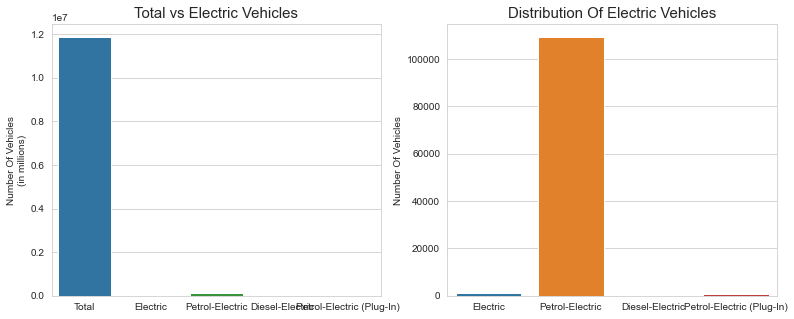

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dataset1 = pd.read_csv('dataset1.csv', sep=',')
total = dataset1['number'].sum()


petrol = dataset1[dataset1['engine'] == 'Petrol']
diesel = dataset1[dataset1['engine'] == 'Diesel']
petrolElectric = dataset1[dataset1['engine'] == 'Petrol-Electric']
petrolElectric2 = dataset1[dataset1['engine'] == 'Petrol-Electric (Plug-In)']
petrolCNG = dataset1[dataset1['engine'] == 'Petrol-CNG']
CNG = dataset1[dataset1['engine'] == 'CNG']
electric = dataset1[dataset1['engine'] == 'Electric']
dieselElectric = dataset1[dataset1['engine'] == 'Diesel-Electric']

electricSum = electric['number'].sum()
petrolElectricSum = petrolElectric['number'].sum()
dieselElectricSum = dieselElectric['number'].sum()
petrolElectric2Sum = petrolElectric2['number'].sum()


fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# append data slices into a numpy array
barPlot1Data = np.array([total, electricSum, petrolElectricSum, dieselElectricSum, petrolElectric2Sum])
barPlot2Data = np.array([electricSum, petrolElectricSum, dieselElectricSum, petrolElectric2Sum])

labels1 = ['Total','Electric', 'Petrol-Electric', 'Diesel-Electric', 'Petrol-Electric (Plug-In)']
labels2 = ['Electric', 'Petrol-Electric', 'Diesel-Electric', 'Petrol-Electric (Plug-In)']




# plot bar charts 1 and 2
barPlot1 = sns.barplot(ax=axes[0], x=labels, y=barPlot1Data)
barPlot2 = sns.barplot(ax=axes[1], x=labels2, y=barPlot2Data)

# set titles and ylabels for bar charts 1 and 2
barPlot1.set_title('Total vs Electric Vehicles', fontsize=15)
barPlot1.set_ylabel('Number Of Vehicles\n(in millions)')
barPlot2.set_title('Distribution Of Electric Vehicles', fontsize=15)
barPlot2.set_ylabel('Number Of Vehicles')


In [78]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset45 = pd.read_csv('dataset45.csv', sep=',')

# extract data slices for SG/HK
sg = dataset45.loc[dataset45['Entity'] == 'Singapore']
hk = dataset45.loc[dataset45['Entity'] == 'Hong Kong']

# extract data slices for plotting
selectSG1 = sg[~sg['Cumulative CO2 emissions'].isnull()]
selectSG2 = sg[~sg['Annual CO2 emissions'].isnull()]
selectHK1 = hk[~hk['Cumulative CO2 emissions'].isnull()]
selectHK2 = hk[~hk['Annual CO2 emissions'].isnull()]

# set plot settings
sns.set_theme()


fig = make_subplots(rows=1, cols=2)
# first plot
labels = {'Year': 'Year', 'Cumulative CO2 emissions': 'Cumulative CO2 emissions'}
first_plot_1 = go.Scatter(x=selectSG1['Year'], y=selectSG1['Cumulative CO2 emissions'], name='Singapore')
first_plot_2 = go.Scatter(x=selectHK1['Year'], y=selectHK1['Cumulative CO2 emissions'], name='Hong Kong')
plot1 = fig.add_trace(first_plot_1, row=1, col=1)
fig.add_trace(first_plot_2, row=1, col=1)
fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="<b>Cumulative</b> CO2 Emissions\n(in billions)", secondary_y=False)
fig.update_yaxes(title_text="<b>Annual CO2 Emissions\n(in millions)", secondary_y=True)

# second plot
second_plot_1 = go.Scatter(x=selectSG2['Year'], y=selectSG2['Annual CO2 emissions'], name="Singapore")
second_plot_2 = go.Scatter(x=selectHK2['Year'], y=selectHK2['Annual CO2 emissions'], name="Hong Kong")
plot2 = fig.add_trace(second_plot_1, row=1, col=2)
fig.add_trace(second_plot_2, row=1, col=2)
fig.update_layout(title='Cumulative And Annual CO2 emissions in SG vs HK')

Text(0.5, 1.0, 'Renewable Electricity Generating Capacity From 2000-2020')

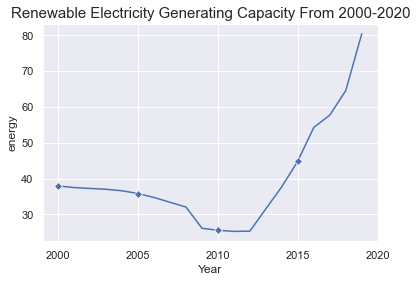

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset7 = pd.read_csv('dataset7.csv', sep=',')

# extract data slice of 'Singapore'
data_sg = dataset7.loc[dataset7['Entity'] == 'Singapore']

line = sns.lineplot(x='Year', y='energy', data=data_sg, marker='D', markevery=5)
line.set_xticks([2000, 2005, 2010, 2015, 2020])
plt.title('Renewable Electricity Generating Capacity From 2000-2020', fontsize=15)

Text(0.5, 1.0, 'CO2 Emissions By Mode Of Transport')

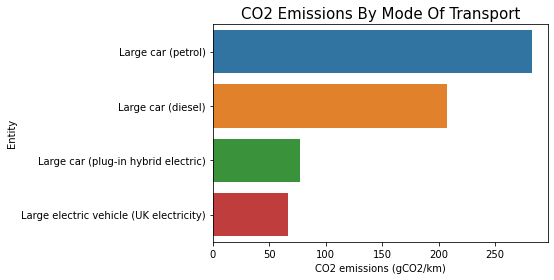

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset8 = pd.read_csv('dataset8.csv', sep=',')

# extract data slices for plotting 
petrol = dataset8[dataset8['Entity'] == 'Large car (petrol)']
diesel = dataset8[dataset8['Entity'] == 'Large car (diesel)']
hybrid = dataset8[dataset8['Entity'] == 'Large car (plug-in hybrid electric)']
electric = dataset8[dataset8['Entity'] == 'Large electric vehicle (UK electricity)']

# concatenate dataframes to single dataframe for plotting
plotData = pd.concat([petrol, diesel, hybrid, electric])

# plot the bar graph
barPlot = sns.barplot(x='CO2 emissions (gCO2/km)', y='Entity', data=plotData)
barPlot.set_title('CO2 Emissions By Mode Of Transport', fontsize=15)

## Objective 2:
### Would Greater Use Of Electric Motor Vehicles Decreases Number Of Road Accidents In Singapore

Text(0, 0.5, 'Cause Of Accident')

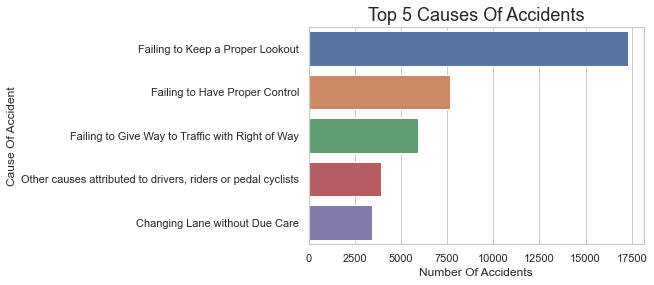

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset3 = pd.read_csv('dataset3.csv', sep=',')

# plot bar chart
sns.set_style('whitegrid')
top5 = dataset3.groupby('causes_of_accident')['number_of_accidents'].sum()
top5 = top5.sort_values(ascending=False)
y = top5.head().keys()
horiBar = sns.barplot(x=top5.head(), y=y)
horiBar.set_title('Top 5 Causes Of Accidents', fontsize=18)
horiBar.set_xlabel('Number Of Accidents')
horiBar.set_ylabel('Cause Of Accident')

Text(0.5, 1.0, 'Distribution Of Choice Of Car')

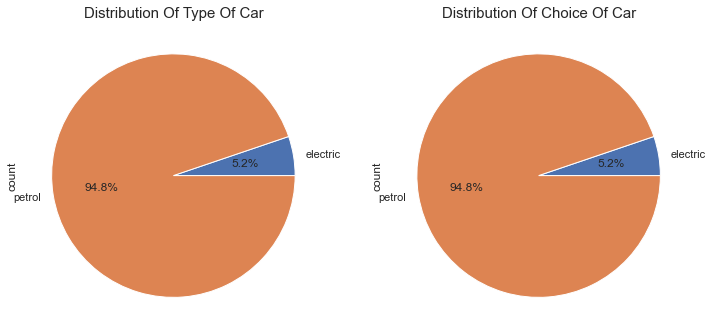

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset6 = pd.read_csv('dataset6.csv', sep=',')

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# plot pie chart 1
pie1 = dataset6.groupby(['type_of_car']).sum().plot(ax=axes[0], kind='pie', y='count', legend=False, autopct='%1.1f%%')
pie1.set_title('Distribution Of Type Of Car', fontsize=15)

# plot pie chart 2
pie2 = dataset6.groupby(['choice_of_car']).sum().plot(ax=axes[1], kind='pie', y='count', legend=False, autopct='%1.1f%%')
pie2.set_title('Distribution Of Choice Of Car', fontsize=15)

Text(0.5, 1.0, 'Proportion Of Safety In Electric Cars')

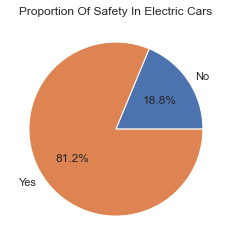

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset6 = pd.read_csv('dataset6.csv', sep=',')

safety = dataset6['safety']
labels=['No', 'Yes']
reasonCount = dataset6.pivot_table(columns=['safety'], aggfunc='size')
plt.pie(reasonCount, labels=labels, autopct='%1.1f%%')
plt.title('Proportion Of Safety In Electric Cars')

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset6 = pd.read_csv('dataset6.csv', sep=',')

px.sunburst(dataset6, path=['choice_of_car', 'reason'], values='count', title='Distribution Of Choice Of Car & Reason For Choice')

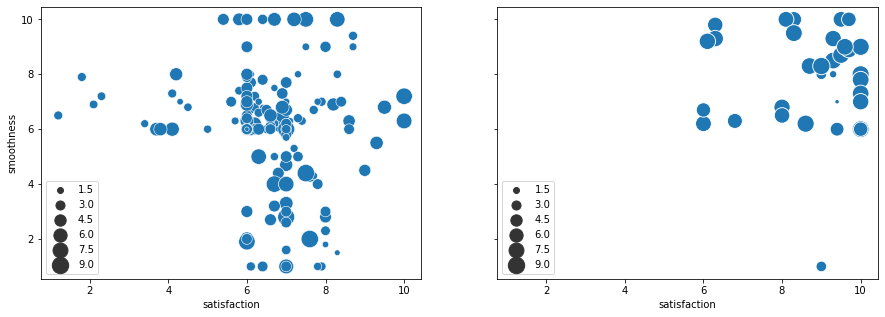

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset6 = pd.read_csv('dataset6.csv', sep=',')

petrol = dataset6[dataset6['type'] == 'petrol']
electric = dataset6[dataset6['type'] == 'electric']


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

# plot scatterplot
petrolPlot = sns.scatterplot(ax=axes[0], x='satisfaction', y='smoothness', size='noise_level', sizes=(20,300), data=petrol)
electricPlot = sns.scatterplot(ax=axes[1], x='satisfaction', y='smoothness', size='noise_level', sizes=(20,300), data=electric)
petrolPlot.legend(loc='lower left')
electricPlot.legend(loc='lower left')

<AxesSubplot:xlabel='road_accidents_witnessed', ylabel='Density'>

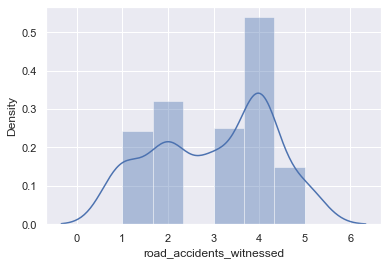

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset6 = pd.read_csv('dataset6.csv', sep=',')

accidents = dataset6['road_accidents_witnessed']

sns.distplot(accidents)

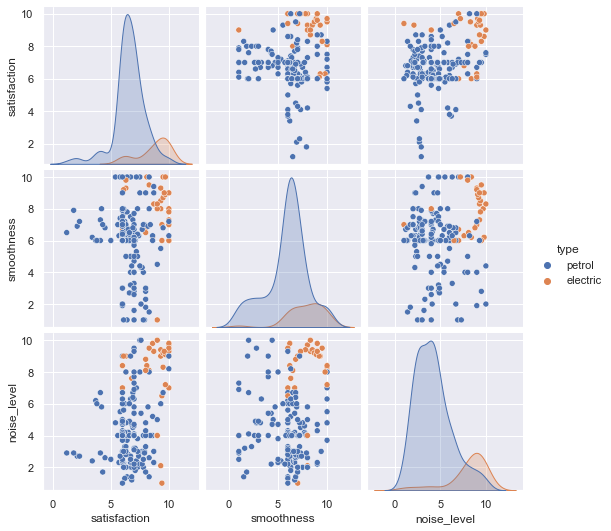

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in data from csv file
dataset6 = pd.read_csv('dataset6.csv', sep=',')

petrol = dataset6[dataset6['type'] == 'petrol']
electric = dataset6[dataset6['type'] == 'electric']

plot = dataset6.drop(columns=['count', 'road_accidents_witnessed'])

# plot scatterplot
g = sns.pairplot(plot, hue='type')